# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\anjan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
from newsapi import NewsApiClient
load_dotenv('../../../../api.env')
api_key = os.getenv('NEWS_API')
type(api_key)

str

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q = 'bitcoin',
    language = 'en',
    sort_by = 'relevancy',
    page_size = 100
)

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q = 'ethereum',
    language = 'en',
    sort_by = 'relevancy',
    page_size = 100
)

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []
for article in btc_news['articles']:
    text = article['content']
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment['compound']
    positive = sentiment['pos']
    neutral = sentiment['neu']
    negative = sentiment['neg']
    dictionary = {'Compound': compound, 'Positive': positive, 'Neutral': neutral, 'Negative': negative, 'text': text}
    btc_sentiment.append(dictionary)
btc_df = pd.DataFrame(btc_sentiment)
btc_df.head()

,Compound,Positive,Neutral,Negative,text
0,-0.4019,0.000,0.922,0.078,"Image source, AFP via Getty Images\r\nImage ca..."
1,0.0000,0.000,1.000,0.000,The plant opening northeast of Niagara Falls t...
2,0.5106,0.099,0.901,0.000,"Earlier this year, Nothing released a pair of ..."
3,0.5859,0.142,0.858,0.000,Dec 23 (Reuters) - The U.S. Securities and Exc...
4,0.5267,0.112,0.888,0.000,People aren't done hijacking major politicians...


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = []
for article in eth_news['articles']:
    text = article['content']
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment['compound']
    positive = sentiment['pos']
    neutral = sentiment['neu']
    negative = sentiment['neg']
    dictionary = {'Compound': compound,
                  'Positive': positive, 
                  'Neutral': neutral, 
                  'Negative': negative,
                  'text': text
                 }
    eth_sentiment.append(dictionary)
eth_df = pd.DataFrame(eth_sentiment)
eth_df.head()

,Compound,Positive,Neutral,Negative,text
0,0.0000,0.000,1.000,0.000,More than $1.2 million has already been spent ...
1,-0.0516,0.074,0.847,0.079,Blockchain startup MonoX Finance said on Wedne...
2,-0.1531,0.000,0.955,0.045,"On Monday, Budweiser joined the non-fungible t..."
3,0.5106,0.099,0.901,0.000,"Earlier this year, Nothing released a pair of ..."
4,0.0000,0.000,1.000,0.000,White Castle double cheeseburger.Erin McDowell...


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Positive,Neutral,Negative
count,100.000000,100.000000,100.000000,100.000000
mean,0.110699,0.065200,0.895200,0.039580
std,0.370045,0.064524,0.089104,0.058491
min,-0.802000,0.000000,0.660000,0.000000
25%,-0.025800,0.000000,0.844750,0.000000
50%,0.000000,0.062500,0.903500,0.000000
75%,0.401900,0.114500,1.000000,0.071250
max,0.790600,0.230000,1.000000,0.246000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Positive,Neutral,Negative
count,100.000000,100.000000,100.00000,100.000000
mean,0.146596,0.070900,0.89573,0.033310
std,0.382293,0.076454,0.09421,0.055291
min,-0.802000,0.000000,0.64000,0.000000
25%,0.000000,0.000000,0.82925,0.000000
50%,0.025800,0.062500,0.92250,0.000000
75%,0.401900,0.122750,1.00000,0.060500
max,0.946000,0.360000,1.00000,0.246000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum: 0.073270

Q: Which coin had the highest compound score?

A: Ethereum: 0.94600

Q. Which coin had the highest positive score?

A: Ethereum: 0.360000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'say', 'said', 'char', 'reuters', 'also', 'found', 'including'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]
        
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,Compound,Positive,Neutral,Negative,text,tokens
0,-0.4019,0.000,0.922,0.078,"Image source, AFP via Getty Images\r\nImage ca...","[image, source, afp, via, getty, imagesimage, ..."
1,0.0000,0.000,1.000,0.000,The plant opening northeast of Niagara Falls t...,"[plant, opening, northeast, niagara, falls, mo..."
2,0.5106,0.099,0.901,0.000,"Earlier this year, Nothing released a pair of ...","[earlier, year, nothing, released, pair, relat..."
3,0.5859,0.142,0.858,0.000,Dec 23 (Reuters) - The U.S. Securities and Exc...,"[dec, us, securities, exchange, commission, ve..."
4,0.5267,0.112,0.888,0.000,People aren't done hijacking major politicians...,"[people, arent, done, hijacking, major, politi..."


In [14]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,Compound,Positive,Neutral,Negative,text,tokens
0,0.0000,0.000,1.000,0.000,More than $1.2 million has already been spent ...,"[million, ha, already, spent, gas, feesone, re..."
1,-0.0516,0.074,0.847,0.079,Blockchain startup MonoX Finance said on Wedne...,"[blockchain, startup, monox, finance, wednesda..."
2,-0.1531,0.000,0.955,0.045,"On Monday, Budweiser joined the non-fungible t...","[monday, budweiser, joined, nonfungible, token..."
3,0.5106,0.099,0.901,0.000,"Earlier this year, Nothing released a pair of ...","[earlier, year, nothing, released, pair, relat..."
4,0.0000,0.000,1.000,0.000,White Castle double cheeseburger.Erin McDowell...,"[white, castle, double, cheeseburgererin, mcdo..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
def bigram_counter(doc): 
    processed = tokenizer(doc)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [17]:
# Generate the Bitcoin N-grams where N=2
btc_str = str(list(btc_df["tokens"]))
bigram_counter(btc_str)

,bigram,count
0,"(el, salvador)",7
1,"(digital, currency)",6
2,"(computer, scientist)",5
3,"(dec, bitcoin)",5
4,"(world, largest)",5
5,"(largest, cryptocurrency)",5
6,"(last, week)",5
7,"(illustration, taken)",4
8,"(inventor, bitcoin)",4
9,"(former, business)",4


In [18]:
# Generate the Ethereum N-grams where N=2
eth_str = str(list(eth_df["tokens"]))
bigram_counter(eth_str)

,bigram,count
0,"(nonfungible, token)",6
1,"(ear, earbuds)",4
2,"(decentralized, finance)",4
3,"(illustration, taken)",4
4,"(venture, capital)",4
5,"(new, york)",4
6,"(digital, currency)",3
7,"(bitcoin, ethereum)",3
8,"(digital, asset)",3
9,"(bestknown, cryptocurrency)",3


In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
btc_processed = tokenizer(btc_str)
print(dict(token_count(btc_processed, 10)))

{'bitcoin': 47, 'ha': 25, 'dec': 21, 'cryptocurrency': 21, 'market': 15, 'value': 14, 'week': 13, 'u': 12, 'investor': 11, 'salvador': 11}


In [21]:
# Use token_count to get the top 10 words for Ethereum
eth_processed = tokenizer(eth_str)
print(dict(token_count(eth_processed, 10)))

{'cryptocurrency': 20, 'ha': 18, 'new': 16, 'bitcoin': 15, 'dec': 14, 'million': 12, 'crypto': 12, 'nft': 12, 'digital': 11, 'ethereum': 11}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

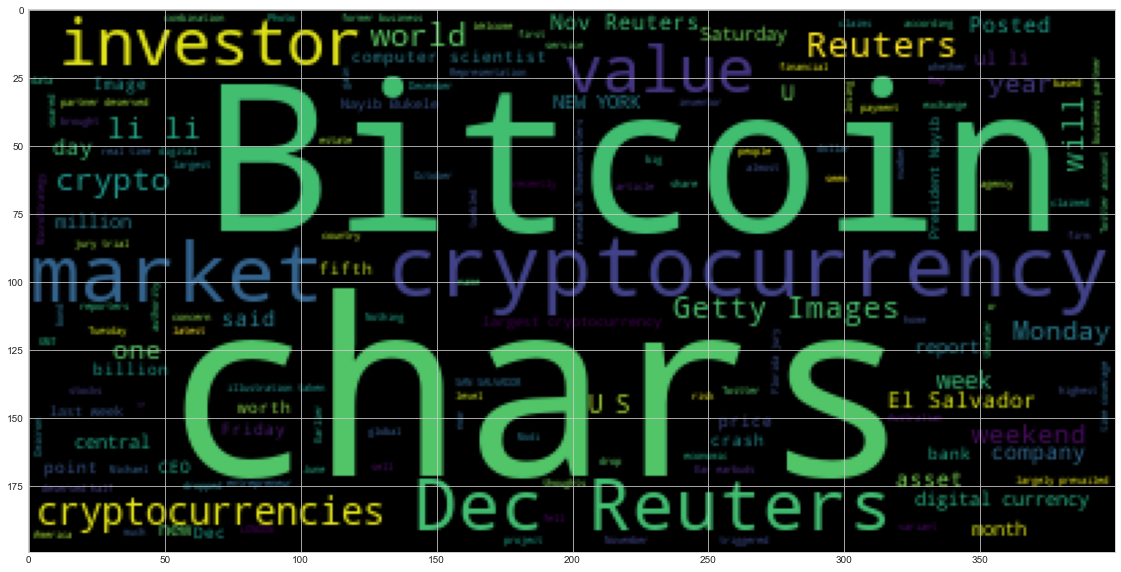

In [23]:
# Generate the Bitcoin word cloud
btc_cloud_str = ' '.join(btc_df['text'])
btc_wc = WordCloud().generate(btc_cloud_str)
plt.imshow(btc_wc)

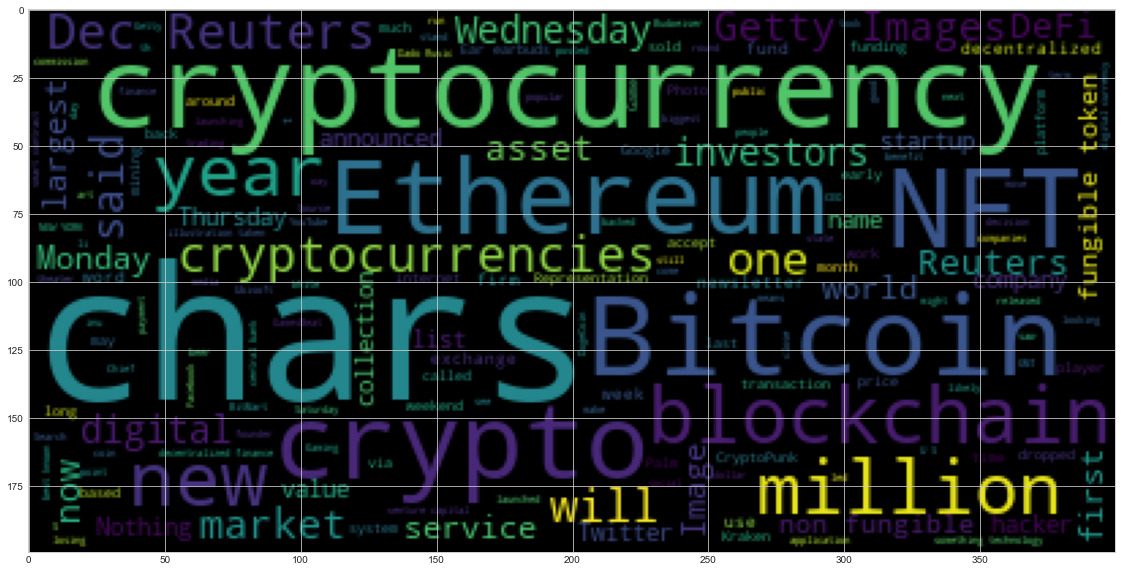

In [24]:
# Generate the Ethereum word cloud
eth_cloud_str = ' '.join(eth_df['text'])
eth_wc = WordCloud().generate(eth_cloud_str)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [27]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [28]:
# Concatenate all of the Bitcoin text together
btc_cloud_str

'Image source, AFP via Getty Images\r\nImage caption, Modi has has more than 70 million Twitter followers\r\nIndian Prime Minister Narendra Modi\'s Twitter account was hacked with a message saying India ha… [+854 chars] The plant opening northeast of Niagara Falls this month, in Somerset, N.Y., is part of a $550 million project by Terawulf, a Bitcoin mining company. The project also includes a proposed 150-megawatt … [+1514 chars] Earlier this year, Nothing released a pair of relatively cheap $99 Ear 1 earbuds with a fun transparent case, wireless charging and decent sound quality. Now, the company (created by OnePlus cofounde… [+1395 chars] Dec 23 (Reuters) - The U.S. Securities and Exchange Commission vetoed two proposals to offer bitcoin exchange-traded funds, dealing a blow to market participants who had hoped the agency would green … [+1769 chars] People aren\'t done hijacking major politicians\' Twitter accounts for financial gain. TechCrunch reports an intruder temporarily seize

In [29]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_cloud_str)

# Add a title to the document
btc_ner.user_data['title'] = 'BTC NER'

In [30]:
# Render the visualization
displacy.render(btc_ner, style = 'ent')

In [31]:
# List all Entities
btc_ent_list = [btc_ner.ents]
btc_ent_list

[(AFP,
  Getty Images,
  Modi,
  more than 70 million,
  Twitter,
  Indian,
  Narendra Modi's,
  Twitter,
  India,
  Niagara Falls,
  this month,
  Somerset,
  N.Y.,
  $550 million,
  Terawulf,
  150-megawatt,
  Earlier this year,
  99,
  OnePlus,
  Dec 23,
  Reuters,
  The U.S. Securities and Exchange Commission,
  two,
  Twitter,
  TechCrunch,
  Indian,
  Narendra Modi's,
  Twitter,
  +1087,
  November 29, 2021,
  REUTERS,
  Dado Ruvic/IllustrationDec,
  12,
  Reuters,
  Sunday,
  above $50,000,
  99,
  December 13th,
  The Ear 1,
  Nothings Ear 1,
  earlier this year,
  Reuters,
  Monday,
  Florida,
  half,
  Reuters,
  8.4%,
  49,228.82,
  20:01,
  Saturday,
  4,514.87,
  Bitcoin,
  28.7%,
  fifth,
  Saturday,
  nearly a billion dollars,
  fifth,
  Saturday,
  nearly a billion dollars,
  Reuters,
  5.5%,
  53,435.9,
  22:04,
  Friday,
  3,112.06,
  Bitcoin,
  22.6%,
  Bitcoin,
  October 19, 2021,
  REUTERS,
  Reuters,
  9.29%,
  48,752.15,
  almost 5%,
  Monday,
  the start of the 

---

### Ethereum NER

In [32]:
# Concatenate all of the Ethereum text together
eth_cloud_str

'More than $1.2 million has already been spent on gas fees\r\nOne of 13 remaining copies of the Official Edition of the Constitution.\r\nImage: Sothebys\r\nAs of last Thursday night, ConstitutionDAO found i… [+5262 chars] Blockchain startup MonoX Finance said on Wednesday that a hacker stole $31 million by exploiting a bug in software the service uses to draft smart contracts.\r\nThis story originally appeared on Ars Te… [+4372 chars] On Monday, Budweiser joined the non-fungible token craze with the launch of its first collection of unique pieces of digital art\xa0\xa0depictions of beer cans that sold for hundreds of dollars each.\xa0\r\nDub… [+1512 chars] Earlier this year, Nothing released a pair of relatively cheap $99 Ear 1 earbuds with a fun transparent case, wireless charging and decent sound quality. Now, the company (created by OnePlus cofounde… [+1395 chars] White Castle double cheeseburger.Erin McDowell/Insider\r\nThe list of name brands getting into crypto grows.\xa0\r\nFast

In [33]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_cloud_str)

# Add a title to the document
eth_ner.user_data['title'] = 'ETH NER'

In [34]:
# Render the visualization
displacy.render(eth_ner, style = 'ent')

In [35]:
# List all Entities
eth_ent_list = [eth_ner.ents]
eth_ent_list

[(More than $1.2 million,
  One,
  13,
  the Official Edition of the,
  Constitution,
  Sothebys,
  last Thursday,
  night,
  ConstitutionDAO,
  Wednesday,
  $31 million,
  Ars Te,
  Monday,
  Budweiser,
  first,
  hundreds of dollars,
  Earlier this year,
  99,
  OnePlus,
  Erin McDowell/Insider,
  White Castle,
  Twitter,
  Nicholas Merten,
  May 2018,
  Shutterstock,
  Regal Cinemas,
  more than 500,
  dozens,
  Google,
  Search,
  2021,
  Squid Game,
  year-long,
  Xboxs,
  Halo Infinite,
  MicroStrategy,
  Michael SaylorJoe Raedle/Getty Images,
  ETF,
  99,
  December 13th,
  The Ear 1,
  Nothings Ear 1,
  earlier this year,
  DeFi,
  Ethereum,
  DeFi,
  The U.S. Captioning Company,
  the British Institute of Verbatim Reporters,
  Bitcoin,
  Saturday,
  the weekend,
  $196 million,
  Bitmar,
  Bitcoin, Ethereum,
  DogeCoin,
  June 29, 2021,
  REUTERS,
  Dado Ruvic/File Photo,
  DUBAI,
  Angerer/Getty Images,
  Budweiser,
  first,
  NFT,
  Monday,
  Bitcoin,
  October 19, 2021,
  R

---